Import of all the libraries and define figures styles

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import wandb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils ## package with custom functions
from PIL import Image
import os
import random
import sys
from scipy.optimize import curve_fit
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from timm.models import create_model
from timm.data import create_dataset, create_loader
wandb.login()

def sns_style():
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    sns.set_palette(["#004c76", "#e31837", "#ffa600", "#558a35","#f9691f","#c71770","#007274","#8d3d91","#474c91"])
    plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.bbox'] = 'tight'
    
def lighter_sns_style():
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    sns.set_palette(["#76ceff", "#f391a0", "#ffd689", "#bbdda6","#fca97f","#f18abe","#88fdff","#d7a5d9","#a3a6d2"])
    plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.bbox'] = 'tight'
    
random.seed(1530)

C:\Users\Martin\Documents\School\Thesis\Git Repository\pytorch-image-models\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: martingratzer (martingratzer-organization). Use `wandb login --relogin` to force relogin


Figure 1.1

In [2]:
## Preparation for plot creation
Q = torch.tensor([[4/10,6/10]])
Q = torch.log(Q)
lists = []
for alpha in [0,0.5,1,2,10,torch.inf]:
    List = []
    for p in range(501):
        P = torch.tensor([[p/500,1-p/500]])
        P = torch.log(P)
        divergence = utils.RenyiDivergence(alpha=alpha)(Q,P)
        List.append(divergence)
    lists.append(List)
    
P = torch.tensor([[4/10,6/10]])
P = torch.log(P)
lists_2 = []
for alpha in [0,0.5,1,2,10,torch.inf]:
    List = []
    for q in range(501):
        Q = torch.tensor([[q/500,1-q/500]])
        Q = torch.log(Q)
        divergence = utils.RenyiDivergence(alpha=alpha)(Q,P)
        List.append(divergence)
    lists_2.append(List)

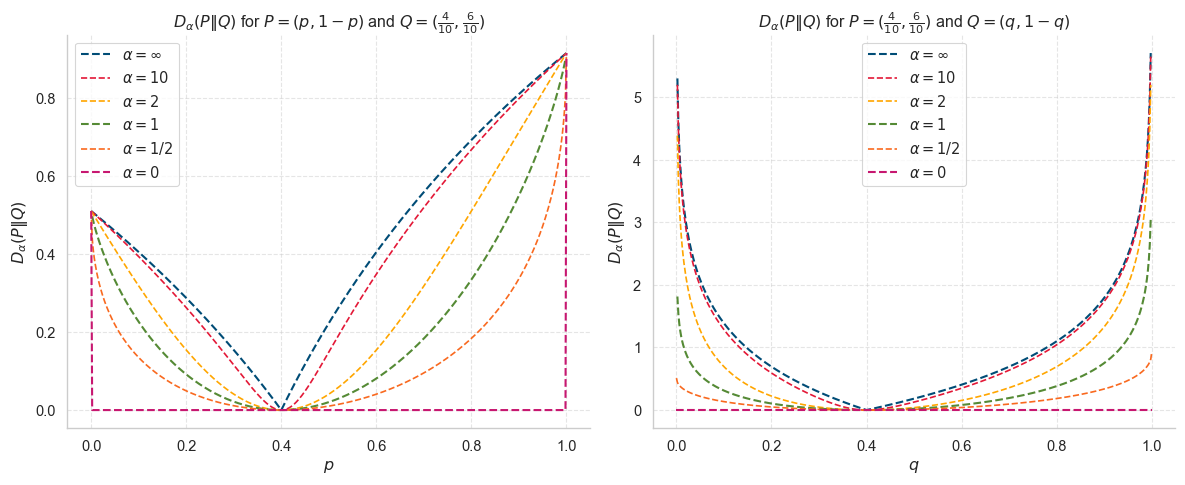

In [3]:
sns_style()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
x_values = np.array(range(501)) / 500
linewidths = [1.5, 1.2, 1.5, 1.2, 1.2, 1.5]  # Thicker for α = 1, 0, infty
labels = [r'$\alpha = 0$', r'$\alpha = 1/2$', r'$\alpha = 1$', 
          r'$\alpha = 2$', r'$\alpha = 10$', r'$\alpha = \infty$']

for i in range(6):
    i = 5 - i
    sns.lineplot(x=x_values, y=np.transpose(np.array(lists[i])), ax=axes[0],linestyle="--", linewidth=linewidths[i], label=labels[i])

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlabel(r'$p$')
axes[0].set_ylabel(r'$D_\alpha(P \| Q)$')
axes[0].set_title(r'$D_\alpha(P \| Q)$ for $P = (p,1-p)$ and $Q=(\frac{4}{10},\frac{6}{10})$')
axes[0].legend()

for i in range(6):
    i = 5 - i
    sns.lineplot(x=x_values, y=np.transpose(np.array(lists_2[i])), ax=axes[1],linestyle="--", linewidth=linewidths[i], label=labels[i])

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlabel(r'$q$')
axes[1].set_ylabel(r'$D_\alpha(P \| Q)$')
axes[1].set_title(r'$D_\alpha(P \| Q)$ for $P = (\frac{4}{10},\frac{6}{10})$ and $Q=(q,1-q)$')
axes[1].legend()

plt.tight_layout()
fig.savefig('renyi_divergence_comparison.pdf')

plt.show()
plt.close()

Figure 1.2

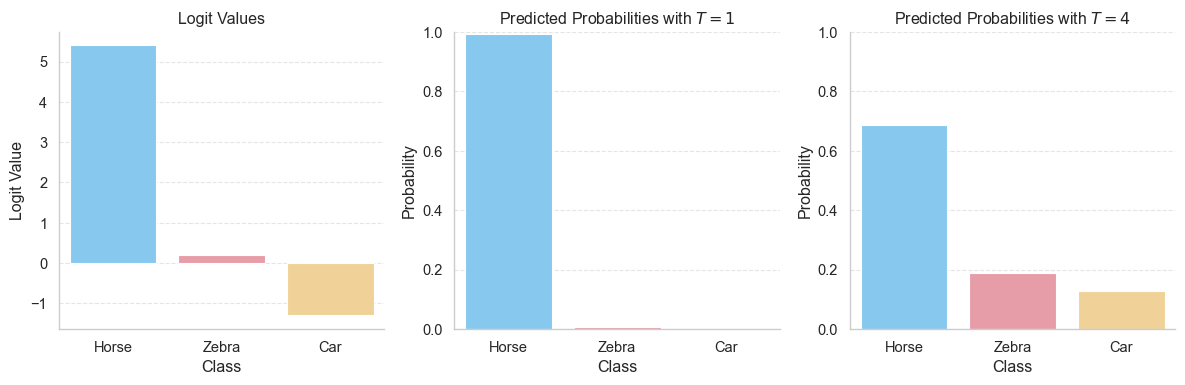

In [4]:
lighter_sns_style()

data = {"Horse": 5.4, "Zebra": 0.2, "Car": -1.3}
classes, logits = zip(*data.items())
logits = np.array(logits)

probabilities = np.exp(logits)/np.sum(np.exp(logits))
probabilities_T4 = np.exp(logits/4)/np.sum(np.exp(logits/4))

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.barplot(x=classes, y=logits, ax=axes[0],hue=classes)
axes[0].set_title("Logit Values")
axes[0].set_ylabel("Logit Value")

sns.barplot(x=classes, y=probabilities, ax=axes[1],hue=classes)
axes[1].set_ylim(0, 1)
axes[1].set_title(r'Predicted Probabilities with $T=1$')
axes[1].set_ylabel("Probability")

sns.barplot(x=classes, y=probabilities_T4, ax=axes[2],hue=classes)
axes[2].set_ylim(0, 1)
axes[2].set_title(r'Predicted Probabilities with $T=4$')
axes[2].set_ylabel("Probability")

for ax in axes:
    sns.despine(ax=ax)
    ax.set_xlabel("Class")

plt.tight_layout()
fig.savefig("temperature_example_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()

Figure 3.1

In [5]:
## Works only if CIFAR-100 dataset is downloaded
def load_cifar100_images(folder_path,superclass,fineclass):
    images = []
    for superclassname in os.listdir(folder_path):
        if superclassname == superclass:
            for classname in os.listdir(os.path.join(folder_path, superclassname)):
                if classname == fineclass:
                    for filename in os.listdir(os.path.join(folder_path, superclassname, classname)):
                        if filename.endswith('.png'):
                            image_path = os.path.join(folder_path, superclassname, classname, filename)
                            with Image.open(image_path) as img:
                                images.append(img.copy())
    return images

folder_path = r'C:\Users\Martin\Documents\School\Thesis\cifar100\train' ## Needs to be changed

superclasses = ["large_omnivores_and_herbivores","household_furniture"]
classes = [["camel","cattle","elephant","chimpanzee","kangaroo"],["bed","couch","chair","table","wardrobe"]]

images = []

for index_superclass,superclass in enumerate(superclasses):
    for index_class,classname in enumerate(classes[index_superclass]):
        images.append(load_cifar100_images(folder_path,superclass,classname))

random_images = [[] for _ in range(10)]
for i in range(10):
    random_images[i] = random.sample(images[i], 10)

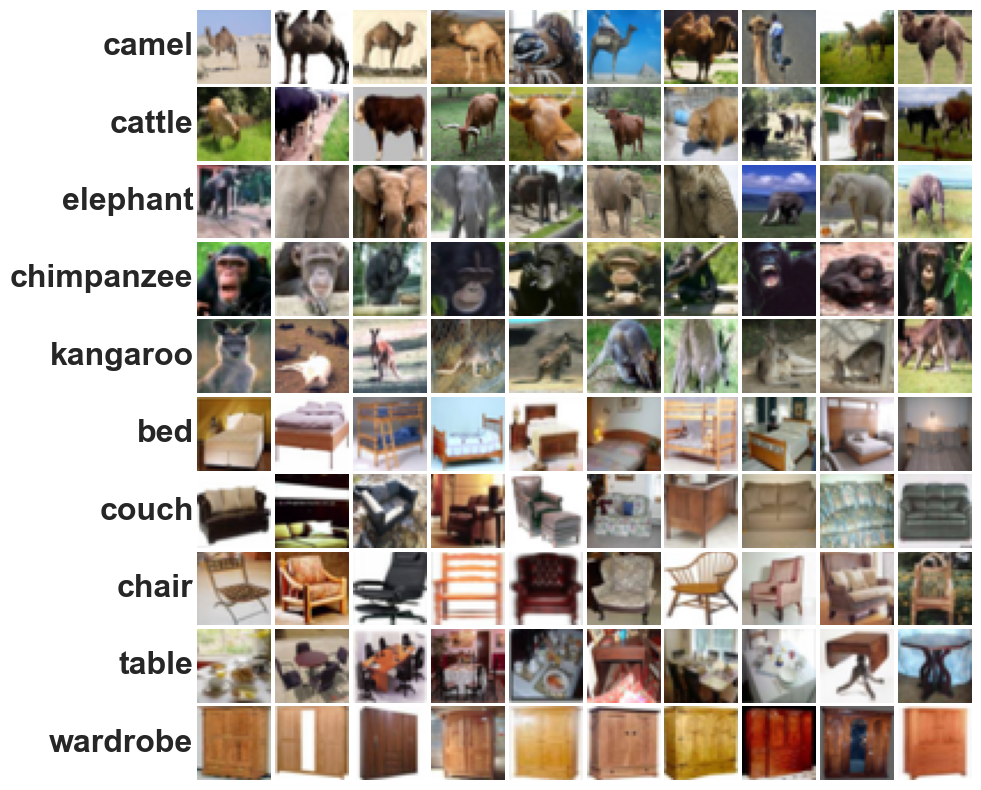

In [6]:
flattened_images = [image for row in random_images for image in row]

classes = [["camel", "cattle", "elephant", "chimpanzee", "kangaroo"],
           ["bed", "couch", "chair", "table", "wardrobe"]]

fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(flattened_images[i])
    ax.axis('off')
    row = i // 10
    col = i % 10

    if col == 0:
        if row < 5:
            label = classes[0][row]
        else:
            label = classes[1][row - 5]
        ax.text(-0.05, 0.5, label, transform=ax.transAxes,
                fontsize=23, va='center', ha='right',fontweight='bold')
        
plt.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig("cifar100_grid.pdf", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Loading data from wandb, which has been used during training on the cluster, which doesn't work if you don't have access to wandb projects.

In [7]:
ENTITY = "martingratzer-organization"
PROJECTS = ["CIFAR-100-RD-Sigmoid-T4", "CIFAR-100-RD", "CIFAR-100-RD-NoAlpha"]

api = wandb.Api(timeout=150)

histories = []

for project in PROJECTS:
    runs = api.runs(f"{ENTITY}/{project}")
    
    for run in runs:
        history = run.history(keys=["eval_top1", "_step"], pandas=True)
        alpha = run.config.get("alpha", None)
        history["alpha"] = alpha
        history["project"] = project
        
        histories.append(history)

main_experiment_df = pd.concat(histories, ignore_index=True)

In [8]:
runs = api.runs(f"{ENTITY}/CIFAR-100")
histories = []
for run in runs:
    history = run.history(keys=["eval_top1", "_step"], pandas=True)
    name = run.config.get("wandb_name", None)
    history['name'] = name
    histories.append(history)
    
teacher_and_vanilla = pd.concat([histories[-1],histories[-3]], ignore_index=True)

In [9]:
runs = api.runs(f"{ENTITY}/CIFAR-100-Alphas-Students")
histories = []
for run in runs:
    history = run.history(keys=["xy_T2", "_step"], pandas=True)
    alpha = run.config.get("alpha", None)
    history['alpha'] = alpha
    histories.append(history)
    
preliminary_xy_T2 = pd.concat(histories, ignore_index=True)

Figure 3.2

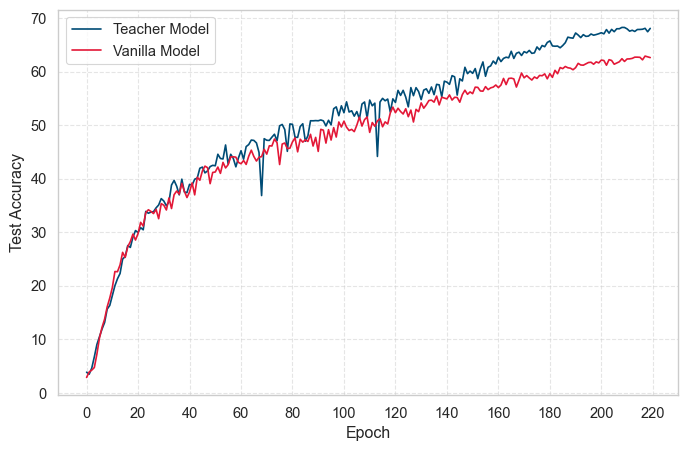

In [10]:
sns_style()

teacher_and_vanilla.columns = ['Epoch','Validation Accuracy','Model Name']
plt.plot(np.arange(220),teacher_and_vanilla['Validation Accuracy'][:220],label = 'Teacher Model')
plt.plot(np.arange(220),teacher_and_vanilla['Validation Accuracy'][220:],label = 'Vanilla Model')

plt.xticks(np.arange(0, 221, 20))
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()

plt.savefig('teacher_vanilla_model.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Figure 3.3 & 3.4

In [11]:
main_exp_filtered_fd_1 = main_experiment_df[main_experiment_df["project"]=="CIFAR-100-RD"]
main_exp_filtered_fd_1 = main_exp_filtered_fd_1[-main_exp_filtered_fd_1["alpha"].isin([15])]

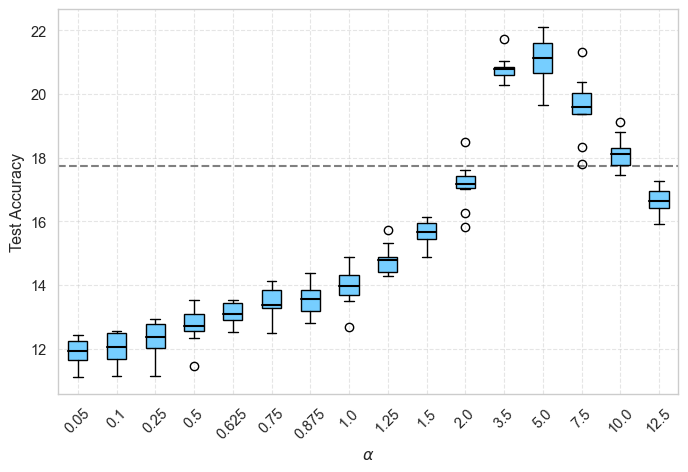

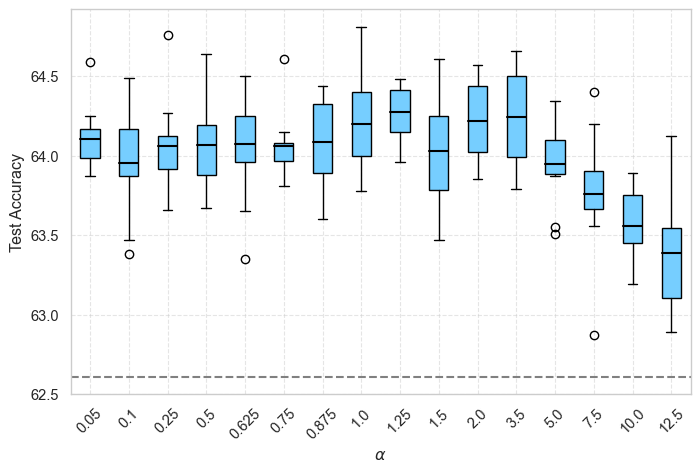

In [12]:
lighter_sns_style()
#step_values = [4, 9, 14, 19, 24, 49, 99, 219] # General use
step_values = [9, 219] # Used in the thesis

for step in step_values:
    df_filtered = main_exp_filtered_fd_1[main_exp_filtered_fd_1["_step"] == step]
    
    list_a = []
    alphas = np.unique(df_filtered['alpha'])
    for alpha in alphas:
        df_filtered_a = df_filtered[df_filtered['alpha'] == alpha]
        list_a.append(list(df_filtered_a['eval_top1']))
    
    fig, ax = plt.subplots()
    ax.set_ylabel('Validation Accuracy')

    ax.axhline(y=teacher_and_vanilla['Validation Accuracy'][220+step], color='gray', linestyle='--', linewidth=1.5)
    bplot = ax.boxplot(
        list_a,
        patch_artist=True,
        showmeans=True,
        meanline=True,
        meanprops={
            "color": "black",
            "linewidth": 1.5,
            "linestyle": "-"
        },
        medianprops={
            "linewidth": 0
        }
    )
    
    ax.set_xticklabels([f'{a}' for a in alphas], rotation=45)
    
    plt.xlabel(r'$\alpha$')
    plt.ylabel("Test Accuracy")
    plt.savefig(f'exp1_box_{step+1}.pdf', dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

Figure 3.5

In [13]:
main_exp_filtered_fd_2 = main_experiment_df.groupby(['_step', 'alpha', 'project'])['eval_top1'].mean().reset_index()
main_exp_filtered_fd_2 = main_exp_filtered_fd_2[main_exp_filtered_fd_2['project'] == "CIFAR-100-RD"]

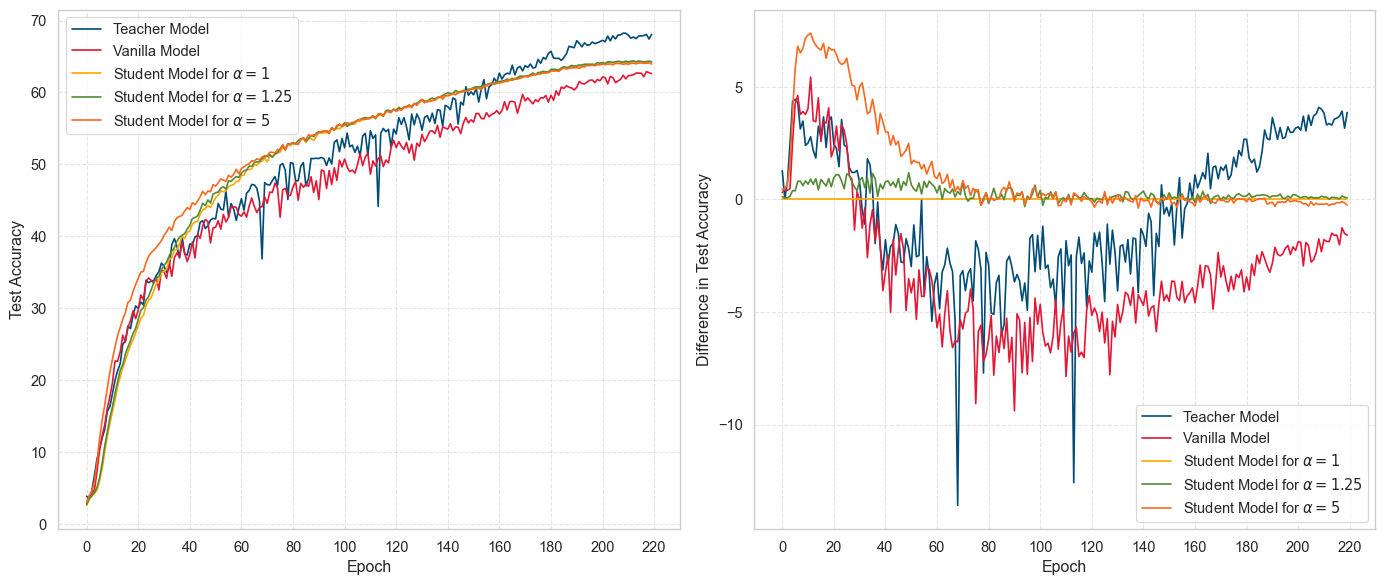

In [14]:
sns_style()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(np.arange(220), teacher_and_vanilla['Validation Accuracy'][:220], label='Teacher Model')
ax1.plot(np.arange(220), teacher_and_vanilla['Validation Accuracy'][220:], label='Vanilla Model')
ax1.plot(np.arange(220), main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1]['eval_top1'], label=r'Student Model for $\alpha = 1$')
ax1.plot(np.arange(220), main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1.25]['eval_top1'], label=r'Student Model for $\alpha = 1.25$')
ax1.plot(np.arange(220), main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 5]['eval_top1'], label=r'Student Model for $\alpha = 5$')

ax1.set_xticks(np.arange(0, 221, 20))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Test Accuracy')
ax1.legend()

diff = np.array(main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1]['eval_top1'])

ax2.plot(np.arange(220), np.array(teacher_and_vanilla['Validation Accuracy'][:220]) - diff, label='Teacher Model')
ax2.plot(np.arange(220), np.array(teacher_and_vanilla['Validation Accuracy'][220:]) - diff, label='Vanilla Model')
ax2.plot(np.arange(220), diff - diff, label=r'Student Model for $\alpha = 1$')
ax2.plot(np.arange(220), np.array(main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1.25]['eval_top1']) - diff, label=r'Student Model for $\alpha = 1.25$')
ax2.plot(np.arange(220), np.array(main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 5]['eval_top1']) - diff, label=r'Student Model for $\alpha = 5$')

ax2.set_xticks(np.arange(0, 221, 20))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Difference in Test Accuracy')
ax2.legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig('exp1_line_and_diff_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Figure 3.6

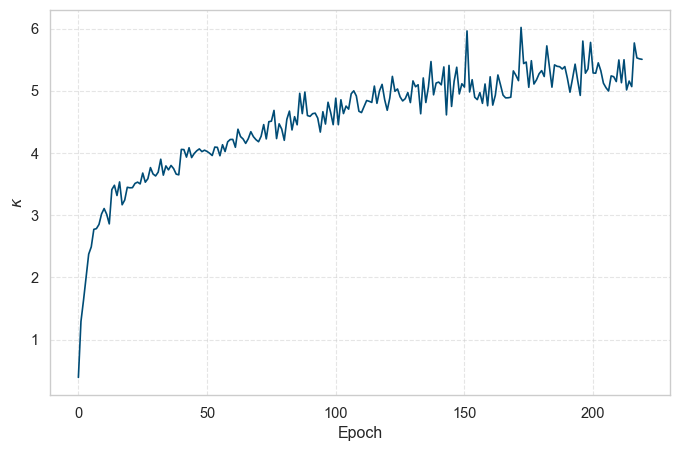

In [15]:
sns_style()
preliminary_group_by = preliminary_xy_T2.groupby(["_step"]).mean()['xy_T2'][:219]

plt.plot(np.arange(220),preliminary_group_by)

plt.xlabel("Epoch")
plt.ylabel(r'$\kappa$')
plt.savefig(f'xy_T2.pdf', dpi=300, bbox_inches='tight')

plt.show()
plt.close()

Figure 3.11 & 3.12

In [16]:
main_exp_filtered_fd_3 = main_experiment_df[main_experiment_df["alpha"].isin([0.5, 0.625, 0.75, 0.875, 1, 1.25, 1.5, 2, 3.5, 5, 7.5])]

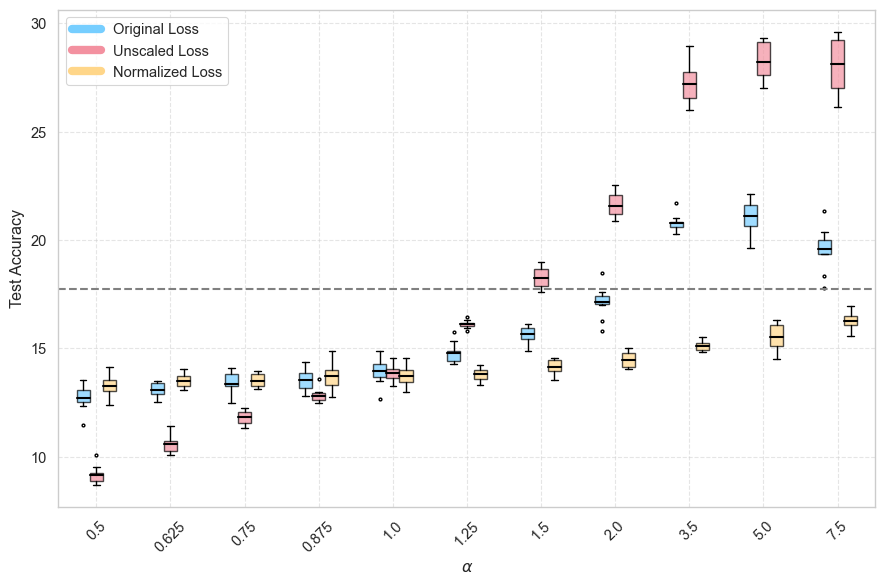

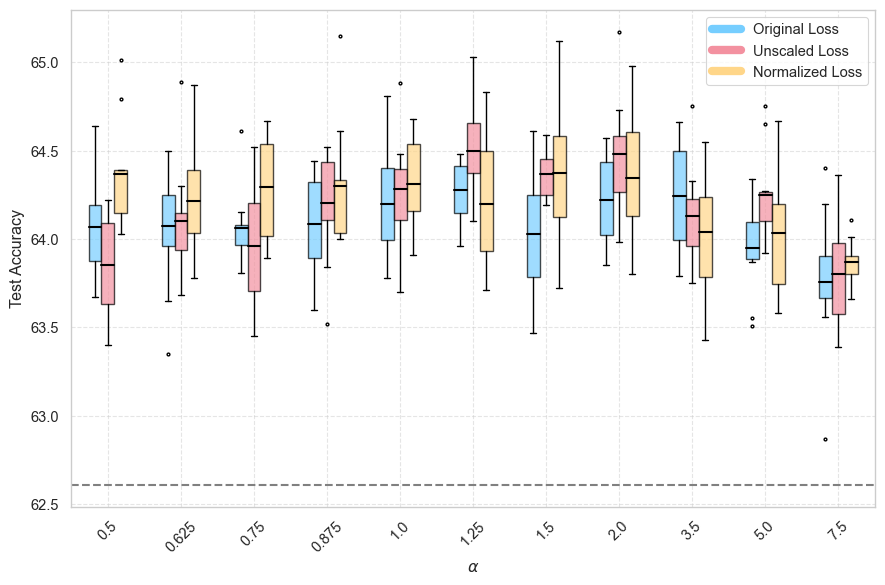

In [17]:
lighter_sns_style()
#step_values = [4, 9, 14, 19, 24, 49, 99, 219] # General use
step_values = [9, 219] # Used in the thesis

project_names = ['Original Loss','Unscaled Loss','Normalized Loss']
projects = ['CIFAR-100-RD', 'CIFAR-100-RD-NoAlpha','CIFAR-100-RD-Sigmoid-T4']
project_colors = ["#76ceff", "#f391a0", "#ffd689"]

for step in step_values:
    df_step = main_exp_filtered_fd_3[main_exp_filtered_fd_3["_step"] == step]
    alphas = np.sort(df_step['alpha'].unique())
    n_alphas = len(alphas)
    n_projects = len(projects)

    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_ylabel('Test Accuracy')

    width = 0.8
    spacing = 1.5
    box_width = width / n_projects
    x_ticks = []

    for i, alpha in enumerate(alphas):
        center = i * spacing
        x_ticks.append(center)
        for j, project in enumerate(projects):
            df_ap = df_step[(df_step['alpha'] == alpha) & (df_step['project'] == project)]
            values = df_ap['eval_top1'].values

            if len(values) == 0:
                continue

            pos = center - width / 2 + j * box_width + box_width / 2
            ax.boxplot(
                [values],
                positions=[pos],
                patch_artist=True,
                widths=box_width,
                showmeans=True,
                meanline=True,
                meanprops={"color": "black", "linewidth": 1.5, "linestyle": "-"},
                medianprops={"linewidth": 0},
                boxprops={"facecolor": project_colors[j], "alpha": 0.7},
                flierprops={"markersize": 2},
                whiskerprops={"linewidth": 1},
                capprops={"linewidth": 1}
            )

    ax.axhline(y=teacher_and_vanilla['Validation Accuracy'][220 + step], color='gray', linestyle='--', linewidth=1.5)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{a}' for a in alphas], rotation=45)
    ax.set_xlabel(r'$\alpha$')

    handles = [plt.Line2D([0], [0], color=project_colors[i], lw=6) for i in range(n_projects)]
    ax.legend(handles, project_names, loc="best")

    plt.tight_layout()
    plt.savefig(f'exp2_box_grouped_{step + 1}.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

Figure 3.13

In [18]:
df_noalpha = main_exp_filtered_fd_3[main_exp_filtered_fd_3["project"] == "CIFAR-100-RD-NoAlpha"].groupby(
    ["_step", "alpha", "project"]).mean().reset_index()
df_sigmoid = main_exp_filtered_fd_3[main_exp_filtered_fd_3["project"] == "CIFAR-100-RD-Sigmoid-T4"].groupby(
    ["_step", "alpha", "project"]).mean().reset_index()


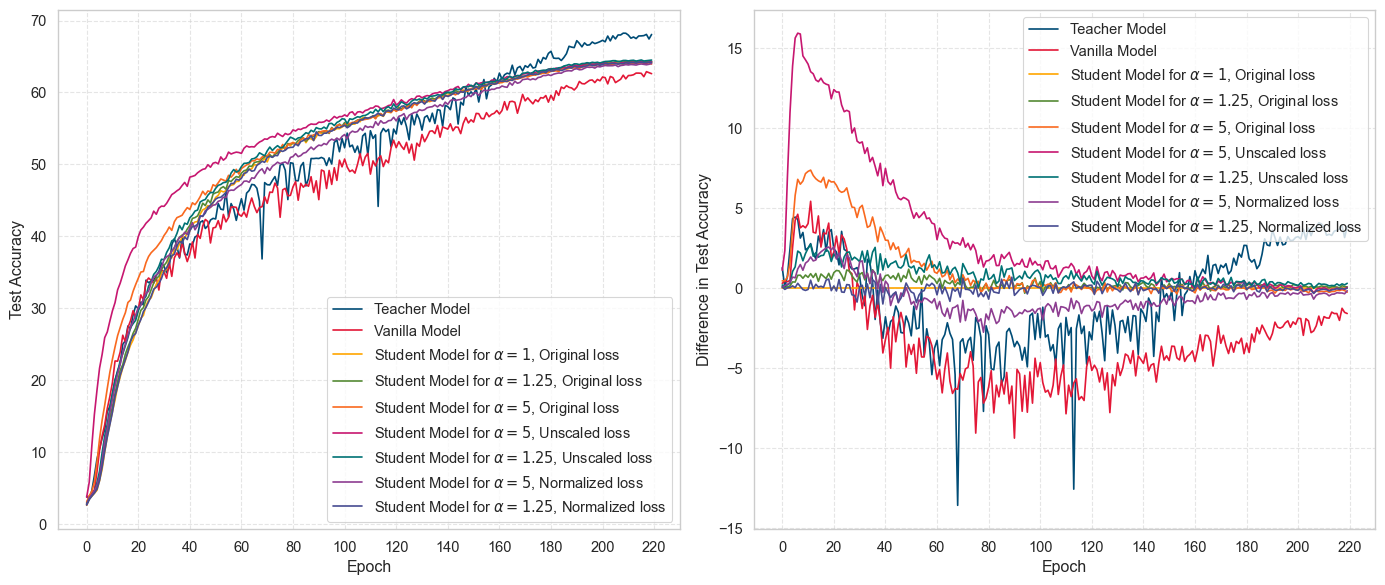

In [19]:
sns_style()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(np.arange(220), teacher_and_vanilla['Validation Accuracy'][:220], label='Teacher Model')
ax1.plot(np.arange(220), teacher_and_vanilla['Validation Accuracy'][220:], label='Vanilla Model')
ax1.plot(np.arange(220), main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1]['eval_top1'], label=r'Student Model for $\alpha = 1$, Original loss')
ax1.plot(np.arange(220), main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1.25]['eval_top1'], label=r'Student Model for $\alpha = 1.25$, Original loss')
ax1.plot(np.arange(220), main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 5]['eval_top1'], label=r'Student Model for $\alpha = 5$, Original loss')

ax1.plot(np.arange(220), df_noalpha[df_noalpha["alpha"] == 5]['eval_top1'], label=r'Student Model for $\alpha = 5$, Unscaled loss')
ax1.plot(np.arange(220), df_noalpha[df_noalpha["alpha"] == 1.25]['eval_top1'], label=r'Student Model for $\alpha = 1.25$, Unscaled loss')

ax1.plot(np.arange(220), df_sigmoid[df_sigmoid["alpha"] == 5]['eval_top1'], label=r'Student Model for $\alpha = 5$, Normalized loss')
ax1.plot(np.arange(220), df_sigmoid[df_sigmoid["alpha"] == 1.25]['eval_top1'], label=r'Student Model for $\alpha = 1.25$, Normalized loss')



ax1.set_xticks(np.arange(0, 221, 20))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Test Accuracy')
ax1.legend()

diff = np.array(main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1]['eval_top1'])

ax2.plot(np.arange(220), np.array(teacher_and_vanilla['Validation Accuracy'][:220]) - diff, label='Teacher Model')
ax2.plot(np.arange(220), np.array(teacher_and_vanilla['Validation Accuracy'][220:]) - diff, label='Vanilla Model')
ax2.plot(np.arange(220), diff - diff, label=r'Student Model for $\alpha = 1$, Original loss')
ax2.plot(np.arange(220), np.array(main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 1.25]['eval_top1']) - diff, label=r'Student Model for $\alpha = 1.25$, Original loss')
ax2.plot(np.arange(220), np.array(main_exp_filtered_fd_2[main_exp_filtered_fd_2["alpha"] == 5]['eval_top1']) - diff, label=r'Student Model for $\alpha = 5$, Original loss')

ax2.plot(np.arange(220), np.array(df_noalpha[df_noalpha["alpha"] == 5]['eval_top1']) - diff, label=r'Student Model for $\alpha = 5$, Unscaled loss')
ax2.plot(np.arange(220), np.array(df_noalpha[df_noalpha["alpha"] == 1.25]['eval_top1']) - diff, label=r'Student Model for $\alpha = 1.25$, Unscaled loss')

ax2.plot(np.arange(220), np.array(df_sigmoid[df_sigmoid["alpha"] == 5]['eval_top1']) - diff, label=r'Student Model for $\alpha = 5$, Normalized loss')
ax2.plot(np.arange(220), np.array(df_sigmoid[df_sigmoid["alpha"] == 1.25]['eval_top1']) - diff, label=r'Student Model for $\alpha = 1.25$, Normalized loss')

ax2.set_xticks(np.arange(0, 221, 20))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Difference in Test Accuracy')
ax2.legend(loc='upper right')

# Adjust layout and save
plt.tight_layout()
plt.savefig('exp2_line_and_diff_plot.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

teacher_model = create_model(
                            'resnet101',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path='C:/Users/Martin/Documents/School/Thesis/Git Repository/pytorch-image-models/trained-models/Resnet101-Teacher.tar',
                            )
teacher_model.to(device)
teacher_model.eval()

student_model_epoch0 = create_model(
                            'resnet18',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path=None,
                            )
student_model_epoch0.to(device)
student_model_epoch0.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [21]:
dataset_train = create_dataset(
        "cifar",
        root="C:/Users/Martin/Documents/School/Thesis/cifar100",
        split="train",
        is_training=True,
        class_map="",
        download=False,
        batch_size=1000,
        seed=2308,
        repeats=0,
        input_img_mode='RGB',
        input_key=None,
        target_key=None,
        num_samples=None,
    )

loader_train = create_loader(
        dataset_train,
        input_size=(3,24,24),
        batch_size=1000,
        is_training=True,
        no_aug=False,
        re_prob=0,
        re_mode="pixel",
        re_count=1,
        re_split=False,
        train_crop_mode=None,
        scale=[0.08, 1.0],
        ratio=[3. / 4., 4. / 3.],
        hflip=0.5,
        vflip=0,
        color_jitter=0.4,
        color_jitter_prob=None,
        grayscale_prob=None,
        gaussian_blur_prob=None,
        auto_augment=None,
        num_aug_repeats=0,
        num_aug_splits=0,
        interpolation="random",
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        num_workers=4,
        distributed=False,
        collate_fn=None,
        pin_memory=False,
        device=device,
        use_prefetcher=False,
        use_multi_epochs_loader=False,
        worker_seeding="all",
    )

In [22]:
def renyi_divergence_gradient(x, y, alpha, T=1.0):
    p = torch.softmax(y/T,dim=1)
    q = torch.softmax(x/T,dim=1)

    term_1 = torch.sum((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)),axis=1).unsqueeze(1)
    term_2 = torch.div((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)),term_1)
    
    gradient =  1/T * (q  - term_2)

    return gradient

In [23]:
def create_gradient_plot(data,alphas,alpha_adjusted=False,title_adjusted="",baseline=False,advanced_alpha_plot=False,title=True):
    lighter_sns_style()
    labels = [0, 1, 10, 11]
    counts = data.label.value_counts()
    notes = ['None','Student','Teacher','Both']
    
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))
    axes = axes.flatten()
    
    for i, label in enumerate(labels):
        subset = data[data.label == label].drop(columns=['label'])
        if advanced_alpha_plot:
            def sigmoid(x):
                return 13.3012 / (1 + np.exp(-(0.9968 * x - 2.9970))) - 0.5755
            subset = subset.div(sigmoid(np.array(alphas)), axis=1)
        elif alpha_adjusted:
            subset = subset.div(alphas, axis=1)
        if baseline:
            subset = subset.div(subset[1], axis=0)
        sns.boxplot(data=subset, showfliers=False, ax=axes[i],color="#76ceff")
        axes[i].set_title(f"Label {label}: {notes[i]} ({counts[label]} obs)")
        axes[i].set_xlabel(r'$\alpha$')
        if advanced_alpha_plot:
            axes[i].set_ylabel(r'$\frac{\partial \mathcal{L}_{\alpha, norm}(\theta,x,y)}{\partial z_j}$')
        elif not alpha_adjusted:
            axes[i].set_ylabel(r'$\frac{\partial \mathcal{L}_{\alpha, unscaled}(\theta,x,y)}{\partial z_j}$')
        else:
            axes[i].set_ylabel(r'$\frac{\partial \mathcal{L}_{\alpha}(\theta,x,y)}{\partial z_j}$')
    
    if title:
        if advanced_alpha_plot:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Alpha Sigmoid Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Alpha Sigmoid Adjusted - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        elif alpha_adjusted:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Alpha Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Alpha Adjusted - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        else:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Without Adjustment with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Without Adjustment - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
    else:
        if advanced_alpha_plot:
            if baseline:
                print(f"Gradients Boxplots - Alpha Sigmoid Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Alpha Sigmoid Adjusted - {title_adjusted} Student Model")
        elif alpha_adjusted:
            if baseline:
                print(f"Gradients Boxplots - Alpha Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Alpha Adjusted - {title_adjusted} Student Model")
        else:
            if baseline:
                print(f"Gradients Boxplots - Without Adjustment with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Without Adjustment - {title_adjusted} Student Model")
    
    plt.tight_layout()

In [24]:
def gradient_plot(student_model,teacher_model,title_adjusted,temperature=1,baseline=False,advanced_alpha_plot=False,title=True):
    for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break
        
    grads = []
    alphas = [0.5,0.75,1,1.25,1.5,2,3.5,5,7.5,10]
    for alpha in alphas:
        grads.append(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2)
        
    data = pd.DataFrame({cat: arr for cat, arr in zip(alphas, grads)})
    
    one_hot_teacher = torch.zeros((teacher_pred.shape[0], 100), device='cuda:0')
    one_hot_teacher.scatter_(1, teacher_pred.unsqueeze(1), 1)
    
    one_hot_student = torch.zeros((student_pred.shape[0], 100), device='cuda:0')
    one_hot_student.scatter_(1, student_pred.unsqueeze(1), 1)
    
    label = one_hot_teacher.reshape(-1) * 10 + one_hot_student.reshape(-1)
    data['label'] = label.cpu().numpy()
    
    create_gradient_plot(data,alphas,alpha_adjusted=False,title_adjusted=title_adjusted,baseline=baseline,title=title)
    plt.savefig(f'gradients_boxplot_noadj.pdf')
    plt.show()
    
    create_gradient_plot(data,alphas,alpha_adjusted=True,title_adjusted=title_adjusted,baseline=baseline,title=title)
    plt.savefig(f'gradients_boxplot_adjusted.pdf')
    plt.show()
    
    if advanced_alpha_plot:
        create_gradient_plot(data,alphas,alpha_adjusted=True,title_adjusted=title_adjusted,baseline=baseline,advanced_alpha_plot=True,title=title)
        plt.savefig(f'gradients_boxplot_sigmoid.pdf')
        plt.show()

Figure 3.7, 3.8 & 3.10

Gradients Boxplots - Without Adjustment - Epoch 0 Student Model


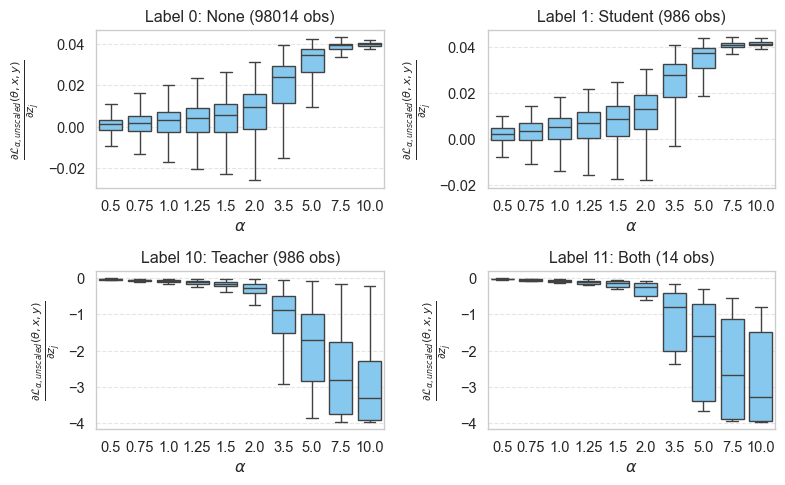

Gradients Boxplots - Alpha Adjusted - Epoch 0 Student Model


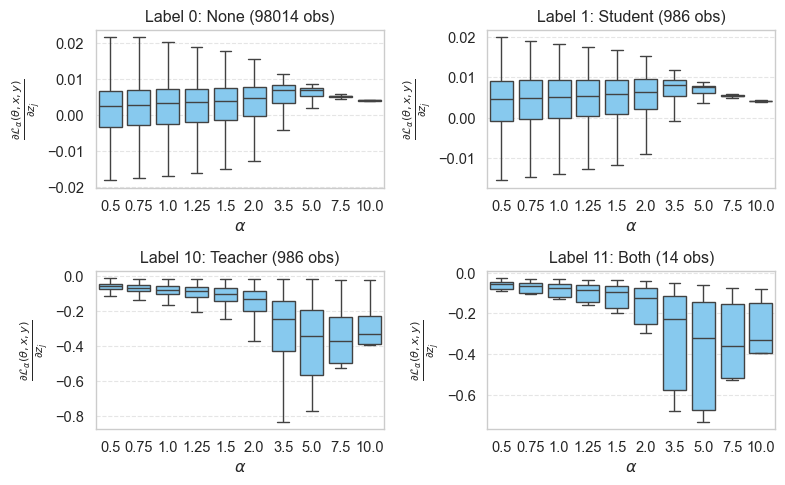

Gradients Boxplots - Alpha Sigmoid Adjusted - Epoch 0 Student Model


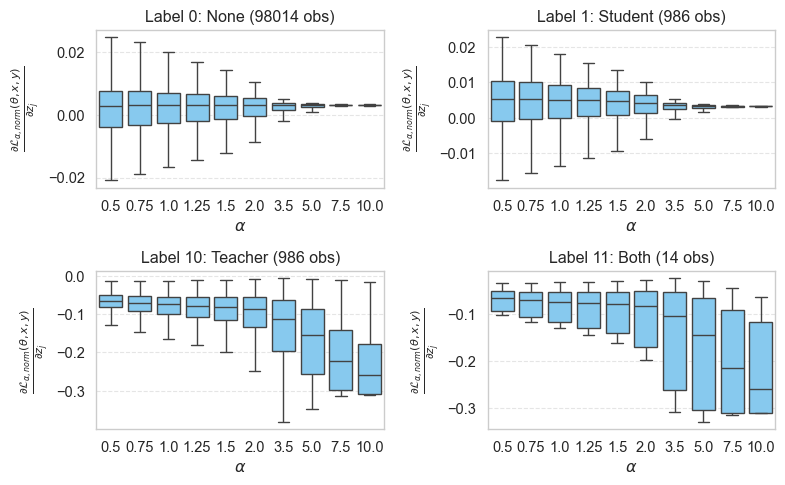

In [25]:
gradient_plot(student_model_epoch0,teacher_model,title_adjusted="Epoch 0",temperature=4,title=False,advanced_alpha_plot=True)

In [41]:
def create_gradient_plot_no_labels(data,alphas,alpha_adjusted=False,title_adjusted="",baseline=False,advanced_alpha_plot=False,title=True):
    lighter_sns_style()
    
    if advanced_alpha_plot:
        def sigmoid(x):
            return 13.3012 / (1 + np.exp(-(0.9968 * x - 2.9970))) - 0.5755
        data = data.div(sigmoid(np.array(alphas)), axis=1)
    elif alpha_adjusted:
        data = data.div(alphas, axis=1)
    if baseline:
        data = data.div(data[1], axis=0)
    sns.boxplot(data=data, showfliers=False, color="#76ceff")
    plt.xlabel(r'$\alpha$')
    if advanced_alpha_plot:
        plt.ylabel(r'$\frac{\partial \mathcal{L}_{\alpha, norm}(\theta,x,y)}{\partial z_j}$')
    elif not alpha_adjusted:
        plt.ylabel(r'$\frac{\partial \mathcal{L}_{\alpha, unscaled}(\theta,x,y)}{\partial z_j}$')
    else:
        plt.ylabel(r'$\frac{\partial \mathcal{L}_{\alpha}(\theta,x,y)}{\partial z_j}$')
    
    
    if title:
        if advanced_alpha_plot:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Alpha Sigmoid Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Alpha Sigmoid Adjusted - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        elif alpha_adjusted:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Alpha Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Alpha Adjusted - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        else:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Without Adjustment with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Without Adjustment - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
    else:
        if advanced_alpha_plot:
            if baseline:
                print(f"Gradients Boxplots - Alpha Sigmoid Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Alpha Sigmoid Adjusted - {title_adjusted} Student Model")
        elif alpha_adjusted:
            if baseline:
                print(f"Gradients Boxplots - Alpha Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Alpha Adjusted - {title_adjusted} Student Model")
        else:
            if baseline:
                print(f"Gradients Boxplots - Without Adjustment with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Without Adjustment - {title_adjusted} Student Model")
    
    plt.tight_layout()

In [113]:
def gradient_plot_no_labels(student_model,teacher_model,title_adjusted,temperature=1,baseline=False,advanced_alpha_plot=False,title=True):
    for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model(input)
        break
        
    grads = []
    alphas = [0.5,0.75,1,1.25,1.5,2,3.5,5,7.5,10]
    alphas = np.arange(0,10,0.5)+0.5
    for alpha in alphas:
        grads.append(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2)
        
    data = pd.DataFrame({cat: arr for cat, arr in zip(alphas, grads)})
    
    create_gradient_plot_no_labels(data,alphas,alpha_adjusted=False,title_adjusted=title_adjusted,baseline=baseline,title=title)
    plt.savefig(f'gradients_boxplot_noadj.pdf')
    plt.show()
    
    create_gradient_plot_no_labels(data,alphas,alpha_adjusted=True,title_adjusted=title_adjusted,baseline=baseline,title=title)
    plt.savefig(f'gradients_boxplot_adjusted.pdf')
    plt.show()
    
    if advanced_alpha_plot:
        create_gradient_plot_no_labels(data,alphas,alpha_adjusted=True,title_adjusted=title_adjusted,baseline=baseline,advanced_alpha_plot=True,title=title)
        plt.savefig(f'gradients_boxplot_sigmoid.pdf')
        plt.show()

Gradients Boxplots - Without Adjustment - Epoch 0 Student Model


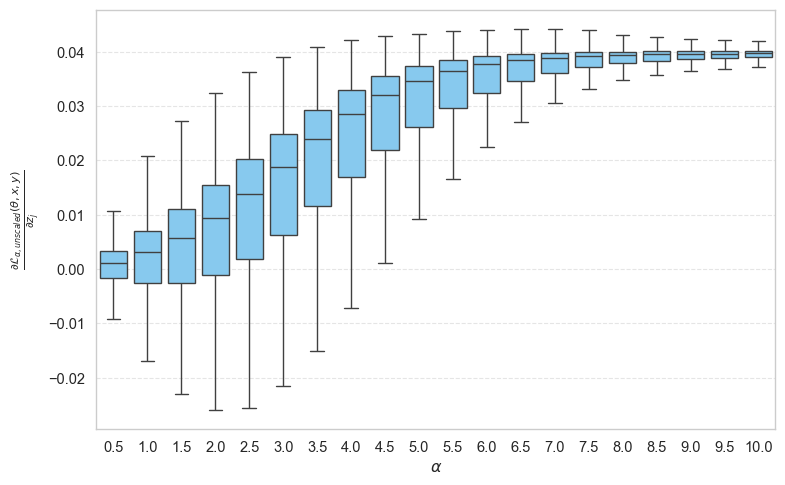

Gradients Boxplots - Alpha Adjusted - Epoch 0 Student Model


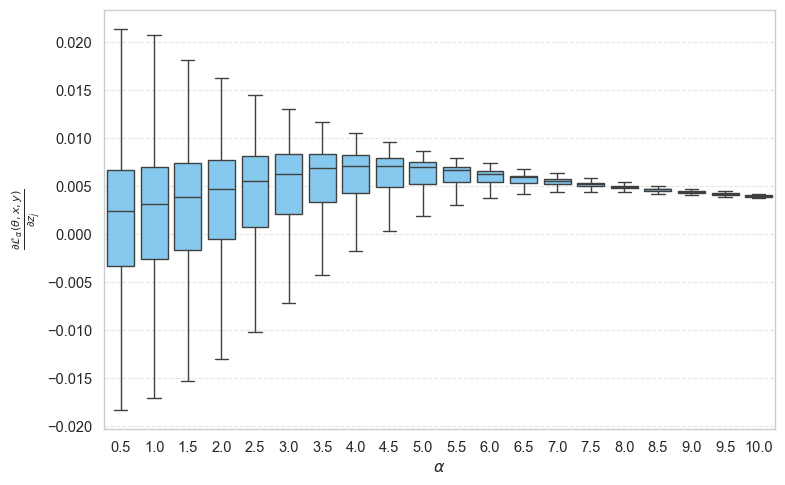

Gradients Boxplots - Alpha Sigmoid Adjusted - Epoch 0 Student Model


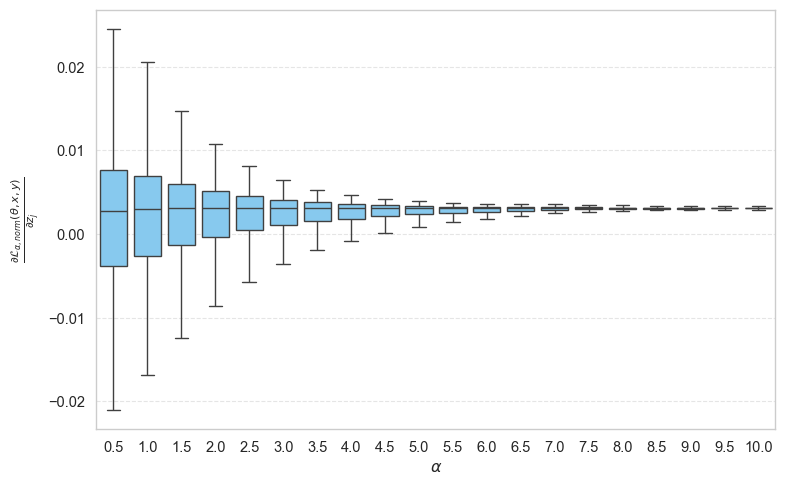

In [114]:
gradient_plot_no_labels(student_model_epoch0,teacher_model,title_adjusted="Epoch 0",temperature=4,title=False,advanced_alpha_plot=True)

Figure 3.9

In [26]:
temperature = 4
for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model_epoch0(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break
        
grads = []
alphas = np.arange(0.5,10,0.05)
for alpha in alphas:
    grads.append(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2)
    
data = pd.DataFrame({cat: arr for cat, arr in zip(alphas, grads)})

one_hot_teacher = torch.zeros((teacher_pred.shape[0], 100), device='cuda:0')
one_hot_teacher.scatter_(1, teacher_pred.unsqueeze(1), 1)

one_hot_student = torch.zeros((student_pred.shape[0], 100), device='cuda:0')
one_hot_student.scatter_(1, student_pred.unsqueeze(1), 1)

label = one_hot_teacher.reshape(-1) * 10 + one_hot_student.reshape(-1)
data['label'] = label.cpu().numpy()

Optimized parameters: a = 0.9947, b = -2.9931, c = 0.0416, d = 0.0019


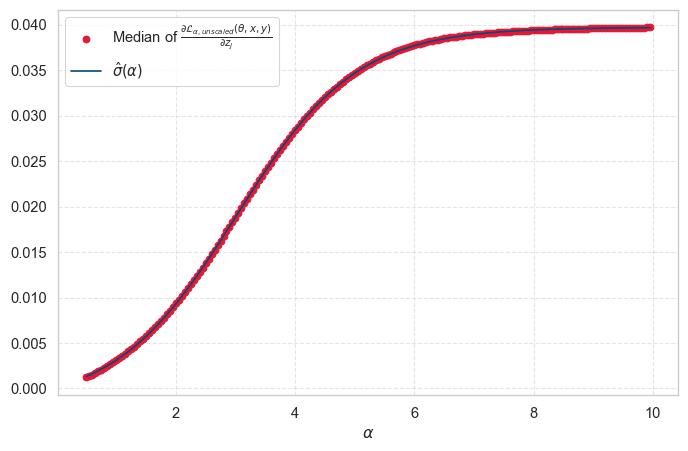

In [27]:
lighter_sns_style()

def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-(a * x + b))) - d

popt, _ = curve_fit(sigmoid, alphas, np.array(data[data.label==0].drop(columns=['label']).median()), p0=[1, 0, 1, 1])
a_opt, b_opt, c_opt, d_opt  = popt

alpha_fit = np.linspace(min(alphas), max(alphas), 200)
data_fit = sigmoid(alpha_fit, *popt)

print(f"Optimized parameters: a = {a_opt:.4f}, b = {b_opt:.4f}, c = {c_opt:.4f}, d = {d_opt:.4f}")

plt.scatter(alphas, np.array(data[data.label==0].drop(columns=['label']).median()), label=r'Median of $\frac{\partial \mathcal{L}_{\alpha,unscaled}(\theta,x,y)}{\partial z_j}$', color="#e31837")
plt.plot(alpha_fit, data_fit, label=r'$\hat{\sigma}(\alpha)$', color="#004c76")
plt.xlabel(r'$\alpha$')
plt.legend()
#plt.savefig('sigmoid_approx.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [92]:
def renyi_divergence_gradient(x, y, alpha, T=1.0):
    x = x.to(dtype=torch.float64)
    y = y.to(dtype=torch.float64)

    p = torch.softmax(y / T, dim=1)
    q = torch.softmax(x / T, dim=1)

    term_1 = torch.sum((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)), axis=1).unsqueeze(1)
    term_2 = torch.div((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)), term_1)

    gradient = 1 / T * (q - term_2)

    return gradient

In [110]:
temperature = 4
for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model_epoch0(input)
        break
        
grads = []
alphas = np.arange(0.5,10.49,0.05)-0.49
for alpha in alphas:
    grads.append(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2)
    
data = pd.DataFrame({cat: arr for cat, arr in zip(alphas, grads)})

Optimized parameters: a = 0.9873, b = -2.9540, c = 0.0418, d = 0.0020


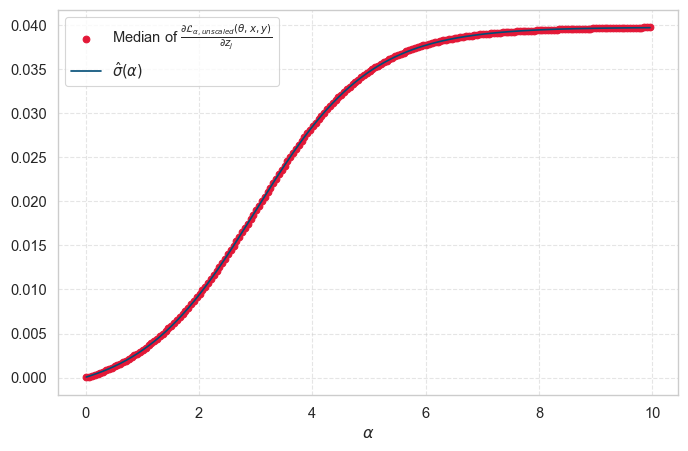

In [111]:
lighter_sns_style()

def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-(a * x + b))) - d

popt, _ = curve_fit(sigmoid, alphas, np.array(data.median()), p0=[1, 0, 1, 1])
a_opt, b_opt, c_opt, d_opt  = popt

alpha_fit = np.linspace(min(alphas), max(alphas), 200)
data_fit = sigmoid(alpha_fit, *popt)

print(f"Optimized parameters: a = {a_opt:.4f}, b = {b_opt:.4f}, c = {c_opt:.4f}, d = {d_opt:.4f}")

plt.scatter(alphas, np.array(data.median()), label=r'Median of $\frac{\partial \mathcal{L}_{\alpha,unscaled}(\theta,x,y)}{\partial z_j}$', color="#e31837")
plt.plot(alpha_fit, data_fit, label=r'$\hat{\sigma}(\alpha)$', color="#004c76")
plt.xlabel(r'$\alpha$')
plt.legend()
plt.savefig('sigmoid_approx.pdf', dpi=300, bbox_inches='tight')
plt.show()